In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [75]:
__author__ = "Ovo Okpubuluku"
__email__ = "ovo@live.ca"

In [76]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [77]:
def data_info(data):
    print('Shape of Dataframe - {}'.format(df.shape))
    print('\n')
    print('Data info: n{}'.format(df.info()))
    print('\n')
    print(' Categorical Features Stats: \n \n{}'.format(df.describe(include='O')))
    print('\n')
    print(' Numerical Features Stats:- \n \n{}'.format(df.describe()))
    print('\n')
    print('Missing Values: \n', data.isnull().sum())
    print('\n')
    print('Duplicate Values: \n', data.duplicated().sum())

In [78]:
data_info(df)

Shape of Dataframe - (525461, 8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
Data info: nNone


 Categorical Features Stats: 
 
        Invoice StockCode                         Description         Country
count    525461    525461                              522533          525461
unique    28816      4632                                4681     

In [79]:
# Quantity is negative
neg_qty_count = df[df['Quantity'] < 0]['Quantity'].count()
neg_qty_count

np.int64(12326)

In [80]:
neg_price_count =  df[df['Price'] < 0]['Price'].count()
neg_price_count

np.int64(3)

In [81]:
# Unique customers in the dataset
unique_customers = df['Customer ID'].nunique()
unique_customers

4383

In [82]:
# Invoice dates

print('The first order date in the data is: ')
print(df['InvoiceDate'].min())

print('The last order date in the data is: ')
print(df['InvoiceDate'].max())

The first order date in the data is: 
2009-12-01 07:45:00
The last order date in the data is: 
2010-12-09 20:01:00


In [83]:
df.isna().sum()/len(df) * 100

Invoice         0.000000
StockCode       0.000000
Description     0.557225
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    20.539488
Country         0.000000
dtype: float64

In [84]:
df.dropna(inplace=True)
print('Null Values after handling:') 
df.isnull().sum()

Null Values after handling:


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [85]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
print(df.duplicated().sum())

0


In [86]:
# droping non‑positive quantities/prices and show the remaining minima
df = df[df['Quantity'] > 0]
print(df['Quantity'].min())

df = df[df['Price'] > 0]
print(df['Price'].min())

1
0.001


In [87]:
df.shape

(400916, 8)

In [88]:
total_orders = df.groupby(['Customer ID'])['Invoice'].nunique()
multiple_orders = np.sum(total_orders > 1) / df['Customer ID'].nunique()
print(f'{100 * multiple_orders:.2f}% of customers ordered more than once.')

67.09% of customers ordered more than once.


In [89]:
df['Total_Price'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [92]:
# Getting rid of irrelevant features in the dataset in preparation fotr Cohort Analysis
retail_data = df.loc[:, ['Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price']]
retail_data.head()

,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


### Cohort Analysis

In [93]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

def get_day(x):
    return dt.datetime(x.year, x.month, x.day, 1)

def get_date(df, month_column, day_column):
    '''extracting year, month and day integer values'''
    year = df[month_column].dt.year
    month = df[month_column].dt.month
    day = df[day_column].dt.day
    return year, month, day

In [96]:
#Assigning for monthly acquisition cohorts
retail_data['InvoiceMonth'] = retail_data['InvoiceDate'].apply(get_month)
month_grouping = retail_data.groupby('Customer ID')['InvoiceMonth']
retail_data['CohortMonth'] = month_grouping.transform('min')

#Assigning for daily acquisition cohorts
retail_data['InvoiceDay'] = retail_data['InvoiceDate'].apply(get_day)
day_grouping = retail_data.groupby('Customer ID')['InvoiceDay']
retail_data['CohortDay'] = day_grouping.transform('min')

retail_data.head()

,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,InvoiceMonth,CohortMonth,InvoiceDay,CohortDay
0,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00
1,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00
2,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00
3,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00
4,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00


In [98]:
# Assigning time offset in months and days
invoice_year, invoice_month, invoice_day = get_date(retail_data, 'InvoiceMonth', 'InvoiceDay')
cohort_year, cohort_month, cohort_day = get_date(retail_data, 'CohortMonth', 'CohortDay')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
days_diff = invoice_day - cohort_day

retail_data['IndexMonths'] = years_diff * 12 + months_diff + 1
retail_data['IndexDays'] = years_diff * 365 + months_diff * 30 + days_diff + 1

retail_data.head()

,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,InvoiceMonth,CohortMonth,InvoiceDay,CohortDay,IndexMonths,IndexDays
0,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00,1,1
1,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00,1,1
2,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00,1,1
3,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00,1,1
4,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12-01,2009-12-01,2009-12-01 01:00:00,2009-12-01 01:00:00,1,1


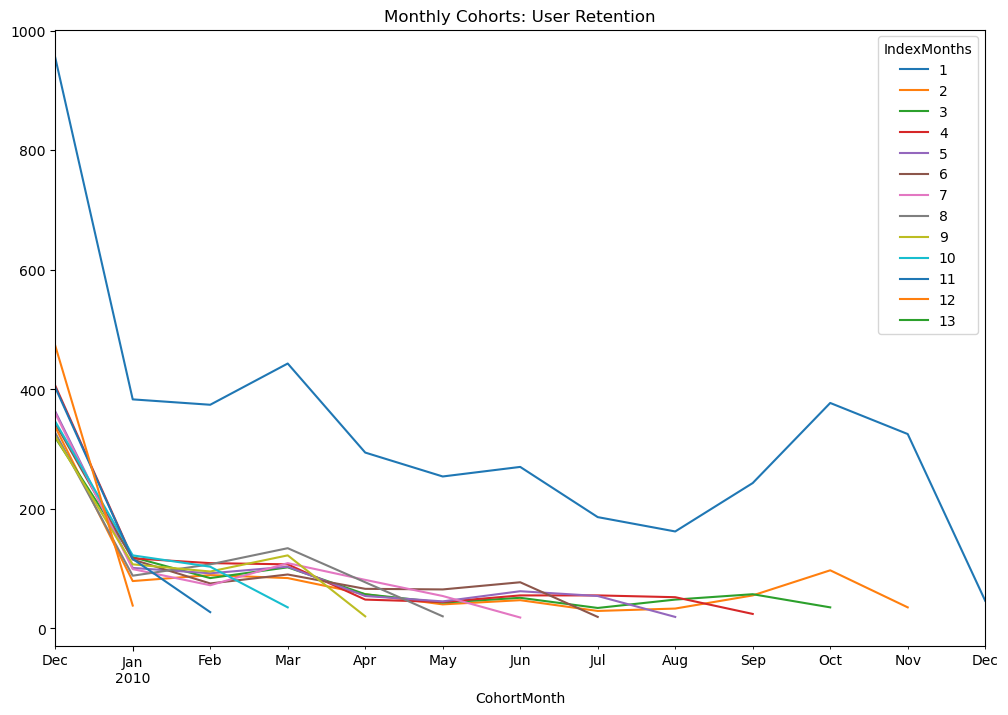

In [101]:
# Counting Monthly active customers from each Cohort
month_group = retail_data.groupby(['CohortMonth', 'IndexMonths'])
cohort_data_month = month_group['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_counts_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='Customer ID')

cohort_counts_mnth.plot(figsize=(12, 8))
plt.title('Monthly Cohorts: User Retention')
plt.show()

In [107]:
day_group = retail_data.groupby(['CohortDay', 'IndexDays'])
cohort_data_days = day_group['Customer ID'].apply(pd.Series.nunique).reset_index()
cohort_counts_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='Customer ID')

print(cohort_counts_days.shape)
cohort_counts_days.head()

(307, 374)


IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2009-12-01 01:00:00,91.0,3.0,7.0,3.0,NaN,1.0,5.0,7.0,5.0,6.0,...,6.0,7.0,6.0,4.0,NaN,5.0,6.0,2.0,8.0,6.0
2009-12-02 01:00:00,91.0,4.0,4.0,NaN,NaN,4.0,6.0,3.0,5.0,5.0,...,6.0,2.0,4.0,NaN,3.0,8.0,5.0,6.0,8.0,NaN
2009-12-03 01:00:00,95.0,2.0,NaN,2.0,NaN,5.0,4.0,1.0,9.0,NaN,...,6.0,2.0,NaN,3.0,3.0,4.0,7.0,6.0,NaN,NaN
2009-12-04 01:00:00,67.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,NaN,4.0,...,6.0,NaN,2.0,4.0,2.0,3.0,3.0,NaN,NaN,NaN
2009-12-05 01:00:00,25.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN


In [108]:
# Calculating Cohort Metrics - Monthly & Daily
# 1. Retention Rate

#Monthly Retention Rates
cohort_sizes_mnth = cohort_counts_mnth.iloc[:,0]
monthly_retention = cohort_counts_mnth.divide(cohort_sizes_mnth, axis=0)
monthly_retention.round(5) * 100

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.288,33.403,42.513,38.010,35.916,37.696,34.241,33.613,36.230,42.199,49.529,24.817
2010-01-01,100.0,20.627,31.070,30.548,26.371,30.026,25.849,22.977,27.937,31.854,30.287,9.922,NaN
2010-02-01,100.0,23.797,22.460,29.144,24.599,20.053,19.251,28.610,25.401,27.540,7.219,NaN,NaN
2010-03-01,100.0,18.962,23.025,24.153,23.251,20.316,24.605,30.248,27.540,7.901,NaN,NaN,NaN
2010-04-01,100.0,19.388,19.388,16.327,18.367,22.449,27.551,26.190,6.803,NaN,NaN,NaN,NaN
2010-05-01,100.0,15.748,16.929,17.323,17.717,25.591,21.260,7.874,NaN,NaN,NaN,NaN,NaN
2010-06-01,100.0,17.407,18.889,20.370,22.963,28.519,6.667,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,100.0,15.591,18.280,29.570,29.032,10.215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,100.0,20.370,29.630,32.099,11.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Daily Retention Rates
cohort_sizes_days = cohort_counts_days.iloc[:,0]
daily_retention = cohort_counts_days.divide(cohort_sizes_days, axis=0)
daily_retention.round(5) * 100

IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2009-12-01 01:00:00,100.0,3.297,7.692,3.297,NaN,1.099,5.495,7.692,5.495,6.593,...,6.593,7.692,6.593,4.396,NaN,5.495,6.593,2.198,8.791,6.593
2009-12-02 01:00:00,100.0,4.396,4.396,NaN,NaN,4.396,6.593,3.297,5.495,5.495,...,6.593,2.198,4.396,NaN,3.297,8.791,5.495,6.593,8.791,NaN
2009-12-03 01:00:00,100.0,2.105,NaN,2.105,NaN,5.263,4.211,1.053,9.474,NaN,...,6.316,2.105,NaN,3.158,3.158,4.211,7.368,6.316,NaN,NaN
2009-12-04 01:00:00,100.0,1.493,1.493,2.985,4.478,2.985,1.493,2.985,NaN,5.970,...,8.955,NaN,2.985,5.970,2.985,4.478,4.478,NaN,NaN,NaN
2009-12-05 01:00:00,100.0,4.000,4.000,NaN,4.000,NaN,NaN,NaN,NaN,4.000,...,NaN,NaN,NaN,NaN,4.000,4.000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-05 01:00:00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07 01:00:00,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


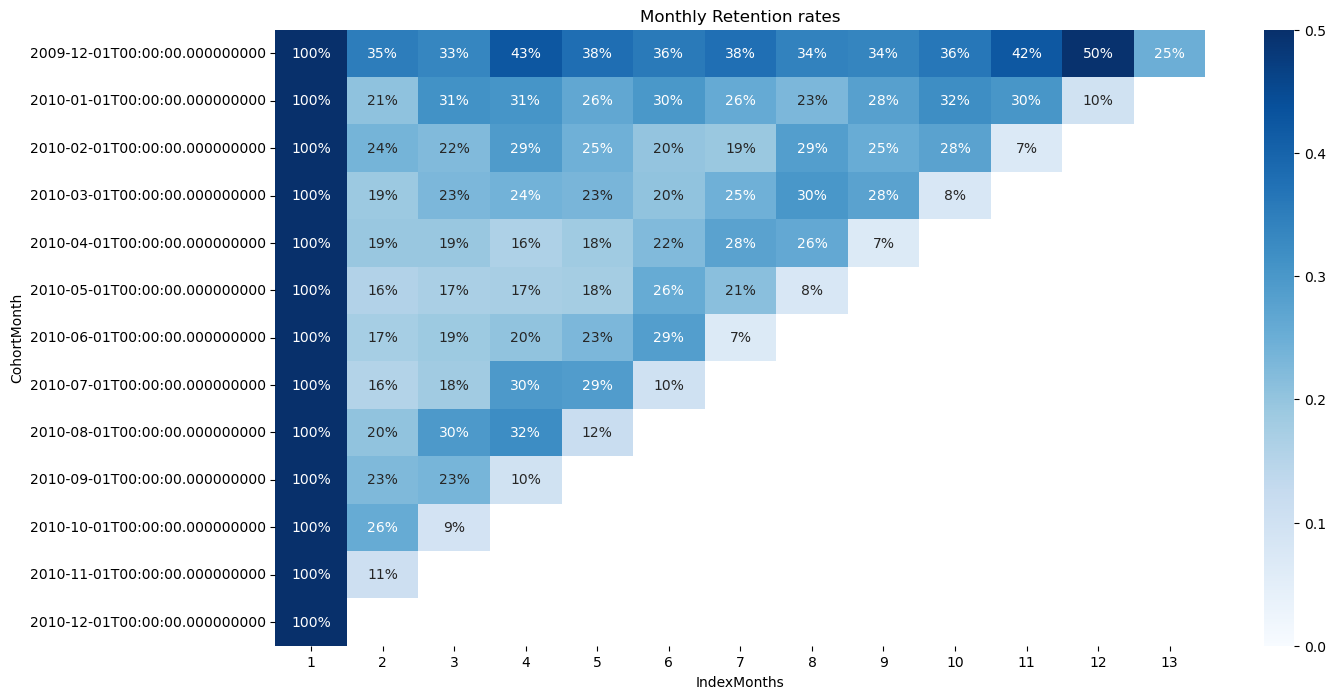

In [111]:
plt.figure(figsize=(15, 8))
plt.title('Monthly Retention rates')
sns.heatmap(data = monthly_retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           vmax = 0.5,
           cmap = 'Blues')

plt.show()

In [112]:
# 2. Average Quantity (Monthly Average Quantity)

cohort_data_month = month_group['Quantity'].mean().reset_index()
average_quantity_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='Quantity')

average_quantity_mnth.round(3)

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,13.169,23.350,21.620,22.650,13.615,15.324,14.325,14.365,26.459,17.586,16.097,14.211,13.129
2010-01-01,9.646,14.169,9.706,13.318,13.111,13.267,12.169,12.831,12.376,12.986,11.049,11.630,NaN
2010-02-01,10.093,10.070,16.143,13.242,10.294,12.164,12.257,10.658,9.612,10.225,10.363,NaN,NaN
2010-03-01,10.408,13.837,11.851,13.381,11.023,13.737,13.219,11.743,11.905,19.054,NaN,NaN,NaN
2010-04-01,10.705,9.018,10.540,14.623,12.629,10.442,10.367,9.890,7.633,NaN,NaN,NaN,NaN
2010-05-01,12.248,9.448,10.311,12.549,13.085,9.447,7.570,5.456,NaN,NaN,NaN,NaN,NaN
2010-06-01,10.913,8.930,13.564,10.751,11.450,14.218,13.212,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,8.474,8.890,7.258,8.916,7.433,6.673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,8.327,8.777,8.878,7.621,12.864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Daily Average Quantity

cohort_data_days = day_group['Quantity'].mean().reset_index()
average_quantity_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='Quantity')

average_quantity_days.round(2)

IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2009-12-01 01:00:00,11.25,34.07,66.50,7.13,NaN,3.92,10.31,28.13,15.40,34.43,...,13.15,11.59,40.41,17.55,NaN,8.98,10.19,228.94,11.40,12.02
2009-12-02 01:00:00,13.07,93.09,3.16,NaN,NaN,6.30,7.23,20.12,7.46,8.01,...,41.79,25.52,8.06,NaN,10.69,11.99,25.80,13.94,6.21,NaN
2009-12-03 01:00:00,16.66,7.35,NaN,10.75,NaN,6.55,6.21,21.16,11.15,NaN,...,13.31,14.36,NaN,5.12,13.24,12.60,9.08,12.40,NaN,NaN
2009-12-04 01:00:00,11.38,6.81,13.61,11.24,30.57,13.36,8.08,6.98,NaN,7.58,...,6.99,NaN,3.77,3.96,2.84,12.08,28.75,NaN,NaN,NaN
2009-12-05 01:00:00,13.21,8.14,7.78,NaN,5.60,NaN,NaN,NaN,NaN,15.44,...,NaN,NaN,NaN,NaN,113.00,11.21,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-05 01:00:00,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07 01:00:00,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


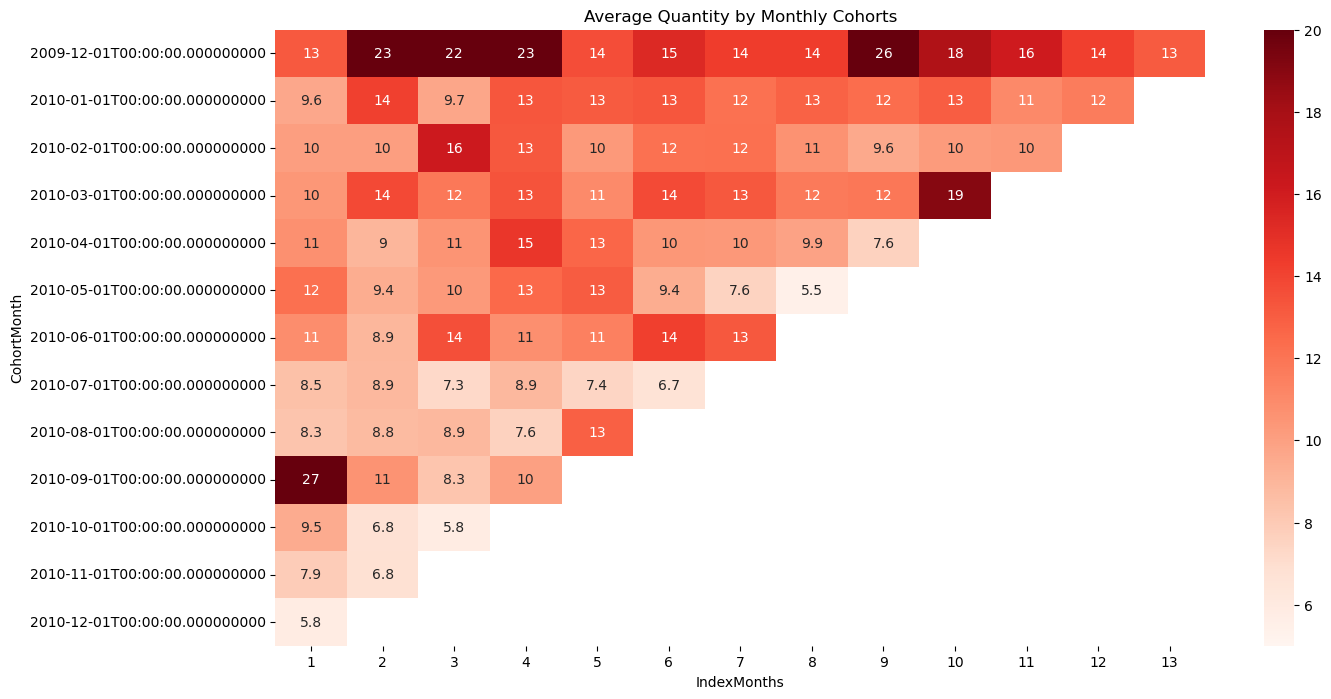

In [118]:
plt.figure(figsize=(15, 8))
plt.title('Average Quantity by Monthly Cohorts')
sns.heatmap(data = average_quantity_mnth,
           annot = True,
            vmin = 5.0,
            vmax = 20.0,
           cmap = 'Reds')

plt.show()

In [119]:
# 3. Average Price

# Monthly Average Price

cohort_data_month = month_group['Price'].mean().reset_index()
average_price_mnth = cohort_data_month.pivot(index='CohortMonth',
                                            columns='IndexMonths',
                                            values='Price')

average_price_mnth.round(3)

IndexMonths,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2009-12-01,3.208,4.502,3.149,3.205,3.130,3.215,3.128,3.097,3.271,3.891,3.498,3.028,3.124
2010-01-01,3.195,2.924,3.199,3.000,3.190,3.550,3.530,3.052,3.568,3.092,3.215,3.267,NaN
2010-02-01,3.320,3.145,4.068,3.084,3.230,3.252,3.687,2.802,2.812,3.082,3.109,NaN,NaN
2010-03-01,4.992,3.061,2.954,2.944,2.980,2.692,2.631,2.922,3.074,3.066,NaN,NaN,NaN
2010-04-01,3.318,3.737,3.376,3.835,2.965,2.838,3.096,3.215,4.025,NaN,NaN,NaN,NaN
2010-05-01,3.291,3.479,2.906,2.737,2.994,2.743,3.035,3.078,NaN,NaN,NaN,NaN,NaN
2010-06-01,3.454,3.161,2.841,3.040,3.020,2.980,3.238,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,4.078,3.218,2.649,2.979,3.133,2.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,3.095,3.276,3.204,3.088,2.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Daily Average Price

cohort_data_days = day_group['Price'].mean().reset_index()
average_price_days = cohort_data_days.pivot(index='CohortDay',
                                            columns='IndexDays',
                                            values='Price')

average_price_days.round(3)

IndexDays,1,2,3,4,5,6,7,8,9,10,...,365,366,367,368,369,370,371,372,373,374
CohortDay,,,,,,,,,,,,,,,,,,,,,
2009-12-01 01:00:00,3.234,2.296,3.332,2.575,NaN,3.555,4.468,3.280,3.400,3.272,...,2.959,3.609,2.181,3.973,NaN,3.143,3.673,6.117,2.484,4.081
2009-12-02 01:00:00,3.008,2.519,3.764,NaN,NaN,3.707,3.241,3.869,2.911,2.785,...,3.001,2.149,3.502,NaN,4.831,3.134,3.157,2.820,3.571,NaN
2009-12-03 01:00:00,2.969,3.484,NaN,2.716,NaN,2.552,6.529,2.053,2.921,NaN,...,3.484,3.967,NaN,2.866,3.104,2.102,3.419,2.677,NaN,NaN
2009-12-04 01:00:00,2.745,3.996,1.632,2.147,2.474,2.456,2.882,3.742,NaN,2.942,...,2.738,NaN,2.710,2.089,3.205,2.083,3.824,NaN,NaN,NaN
2009-12-05 01:00:00,3.581,4.048,4.159,NaN,3.550,NaN,NaN,NaN,NaN,2.620,...,NaN,NaN,NaN,NaN,2.792,2.689,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-05 01:00:00,2.406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-06 01:00:00,2.927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-12-07 01:00:00,3.516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


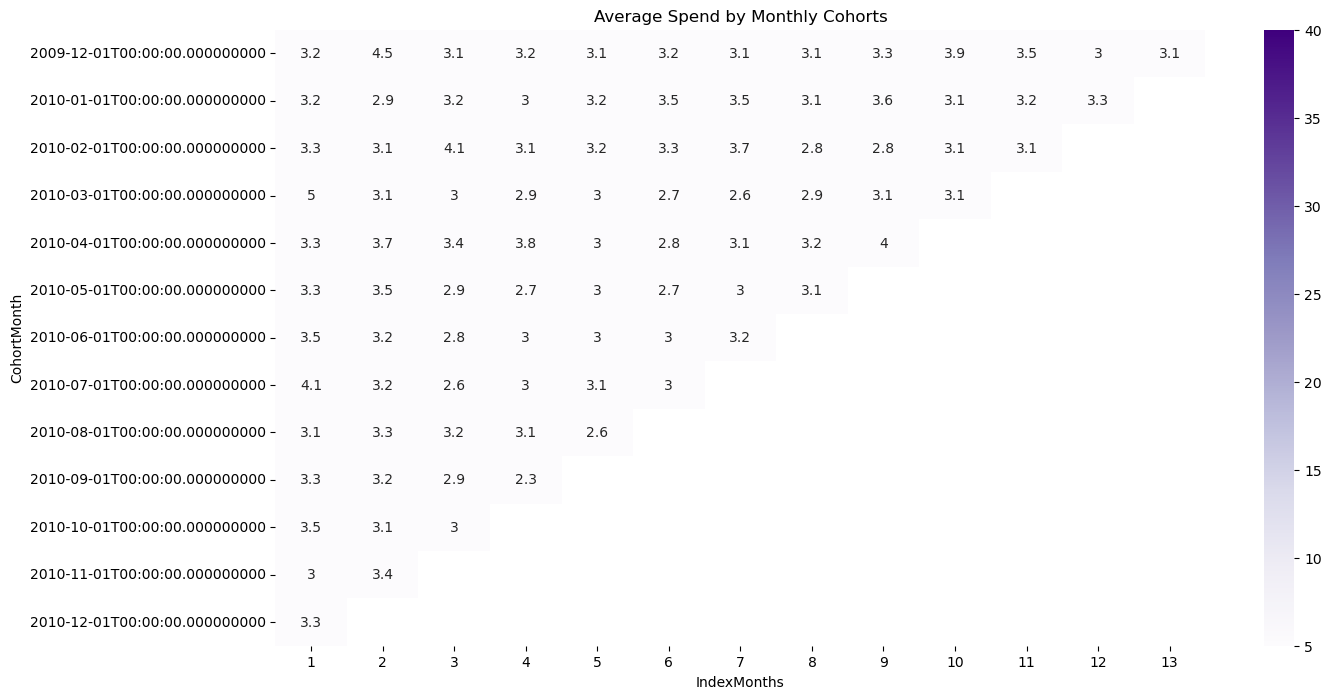

In [126]:
plt.figure(figsize=(15, 8))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(data = average_price_mnth,
           annot = True,
            vmin = 5.0,
            vmax = 40.0,
           cmap = 'Purples')

plt.show()

# Data Modeling RFM Model

In [127]:
now = dt.datetime(2011, 12, 9, 12, 50)
now

datetime.datetime(2011, 12, 9, 12, 50)

In [128]:
df['Invoice'] = pd.to_datetime(df['Invoice'])

In [129]:
recency_data = df.groupby(by='Customer ID', as_index=False)['Invoice'].max()
recency_data.columns = ['Customer ID', 'LastPurchaseDate']
recency_data.head()

,Customer ID,LastPurchaseDate
0,12346.0,1970-01-01 00:00:00.000513774
1,12347.0,1970-01-01 00:00:00.000537626
2,12348.0,1970-01-01 00:00:00.000524140
3,12349.0,1970-01-01 00:00:00.000529344
4,12351.0,1970-01-01 00:00:00.000536012


In [130]:
recency_data['Recency'] = recency_data['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_data.drop('LastPurchaseDate', axis=1, inplace=True)
recency_data.head()

,Customer ID,Recency
0,12346.0,15317
1,12347.0,15317
2,12348.0,15317
3,12349.0,15317
4,12351.0,15317


In [132]:
frequency_data = df.groupby(by='Customer ID', as_index=False)['Invoice'].count()
frequency_data.columns = ['Customer ID', 'Frequency']
frequency_data.head()

,Customer ID,Frequency
0,12346.0,33
1,12347.0,71
2,12348.0,20
3,12349.0,102
4,12351.0,21


In [133]:
monetary_data = df.groupby(by='Customer ID', as_index=False).agg({'Price': 'sum'})
monetary_data.columns = ['Customer ID', 'Monetary']
monetary_data.head()

,Customer ID,Monetary
0,12346.0,206.36
1,12347.0,162.95
2,12348.0,14.39
3,12349.0,875.34
4,12351.0,49.46


In [134]:
rf_data = recency_data.merge(frequency_data, on='Customer ID')
rfm_data = rf_data.merge(monetary_data, on='Customer ID')
rfm_data.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,15317,33,206.36
1,12347.0,15317,71,162.95
2,12348.0,15317,20,14.39
3,12349.0,15317,102,875.34
4,12351.0,15317,21,49.46


In [135]:
df[df['Customer ID']==12346]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
27994,1970-01-01 00:00:00.000491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.0,United Kingdom,45.00
28251,1970-01-01 00:00:00.000491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.0,United Kingdom,22.50
28254,1970-01-01 00:00:00.000491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.0,United Kingdom,22.50
39398,1970-01-01 00:00:00.000492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.0,United Kingdom,22.50
39411,1970-01-01 00:00:00.000492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.0,United Kingdom,1.00
45228,1970-01-01 00:00:00.000493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,United Kingdom,22.50
45230,1970-01-01 00:00:00.000493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,United Kingdom,22.50
56117,1970-01-01 00:00:00.000494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.0,United Kingdom,22.50
66084,1970-01-01 00:00:00.000495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.0,United Kingdom,22.50
107800,1970-01-01 00:00:00.000499763,20682,RED SPOTTY CHILDS UMBRELLA,1,2010-03-02 13:08:00,3.25,12346.0,United Kingdom,3.25


In [136]:
(now - dt.datetime(2011, 1, 18)).days == 325

True

In [137]:
# Building RFM segments using quartiles   

quartiles = rfm_data.quantile(q = [0.25, 0.5, 0.75])
print(quartiles)

quartiles = quartiles.to_dict()
quartiles


      Customer ID  Recency  Frequency  Monetary
0.25     13882.50  15317.0       18.0   56.7375
0.50     15350.50  15317.0       43.0  135.6650
0.75     16834.25  15317.0      100.0  318.1500


{'Customer ID': {0.25: 13882.5, 0.5: 15350.5, 0.75: 16834.25},
 'Recency': {0.25: 15317.0, 0.5: 15317.0, 0.75: 15317.0},
 'Frequency': {0.25: 18.0, 0.5: 43.0, 0.75: 100.0},
 'Monetary': {0.25: 56.7375, 0.5: 135.66500000000002, 0.75: 318.15}}

In [138]:
rfm_sgmnt = rfm_data

'''Function arguments: v = value, rfm = RFMscore, q = quartiles(dict))'''
def Rfunction(v, rfm, q):
    if v <= q[rfm][0.25]:
        return 1
    elif v <= q[rfm][0.50]:
        return 2
    elif v <= q[rfm][0.75]:
        return 3
    else:
        return 4

'''Function arguments: v = value, rfm = RFMscore, q = quartiles(dict))'''
def FMfunction(v, rfm, q):
    if v <= q[rfm][0.25]:
        return 4
    elif v <= q[rfm][0.50]:
        return 3
    elif v <= q[rfm][0.75]:
        return 2
    else:
        return 1

In [139]:

rfm_sgmnt['R'] = rfm_sgmnt['Recency'].apply(Rfunction, args=('Recency', quartiles)).map(str)
rfm_sgmnt['F'] = rfm_sgmnt['Frequency'].apply(FMfunction, args=('Frequency', quartiles)).map(str)
rfm_sgmnt['M'] = rfm_sgmnt['Monetary'].apply(FMfunction, args=('Monetary', quartiles)).map(str)

rfm_sgmnt.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,12346.0,15317,33,206.36,1,3,2
1,12347.0,15317,71,162.95,1,2,2
2,12348.0,15317,20,14.39,1,3,4
3,12349.0,15317,102,875.34,1,1,1
4,12351.0,15317,21,49.46,1,3,4


In [140]:
rfm_sgmnt['RFMscore'] = rfm_sgmnt['R'] + rfm_sgmnt['F'] + rfm_sgmnt['M']

rfm_sgmnt.head(10)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMscore
0,12346.0,15317,33,206.36,1,3,2,132
1,12347.0,15317,71,162.95,1,2,2,122
2,12348.0,15317,20,14.39,1,3,4,134
3,12349.0,15317,102,875.34,1,1,1,111
4,12351.0,15317,21,49.46,1,3,4,134
5,12352.0,15317,18,54.60,1,4,4,144
6,12353.0,15317,20,38.78,1,3,4,134
7,12355.0,15317,22,52.78,1,3,4,134
8,12356.0,15317,83,259.43,1,2,2,122
9,12357.0,15317,165,1395.64,1,1,1,111


In [141]:
rfm_sgmnt[rfm_sgmnt['RFMscore'] == '111'].sort_values('Monetary', ascending=False).head()


,Customer ID,Recency,Frequency,Monetary,R,F,M,RFMscore
1840,14911.0,15317,5568,31560.54,1,1,1,111
1269,14156.0,15317,2646,18678.87,1,1,1,111
3989,17841.0,15317,4944,14943.25,1,1,1,111
1606,14606.0,15317,3802,10843.48,1,1,1,111
251,12748.0,15317,2531,9116.36,1,1,1,111


In [142]:
best = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='111'])
loyal = len(rfm_sgmnt[rfm_sgmnt['F']=='1'])
top_spenders = len(rfm_sgmnt[rfm_sgmnt['M']=='1'])
almost_lost = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='311'])
lost = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='411'])
lost_cheap = len(rfm_sgmnt[rfm_sgmnt['RFMscore']=='444'])

def segment(x):
    print(('There are {} customers in this segment').format(x))

In [143]:
segment(best)
segment(loyal)
segment(top_spenders)
segment(almost_lost)
segment(lost_cheap)

There are 931 customers in this segment
There are 1077 customers in this segment
There are 1078 customers in this segment
There are 0 customers in this segment
There are 0 customers in this segment


In [146]:
rfm_sgmnt.describe()


,Customer ID,Recency,Frequency,Monetary
count,4312.000000,4312.0,4312.000000,4312.000000
mean,15349.290353,15317.0,92.976809,307.365166
std,1701.200176,0.0,198.909265,858.055126
min,12346.000000,15317.0,1.000000,0.190000
25%,13882.500000,15317.0,18.000000,56.737500
50%,15350.500000,15317.0,43.000000,135.665000
75%,16834.250000,15317.0,100.000000,318.150000
max,18287.000000,15317.0,5568.000000,31560.540000


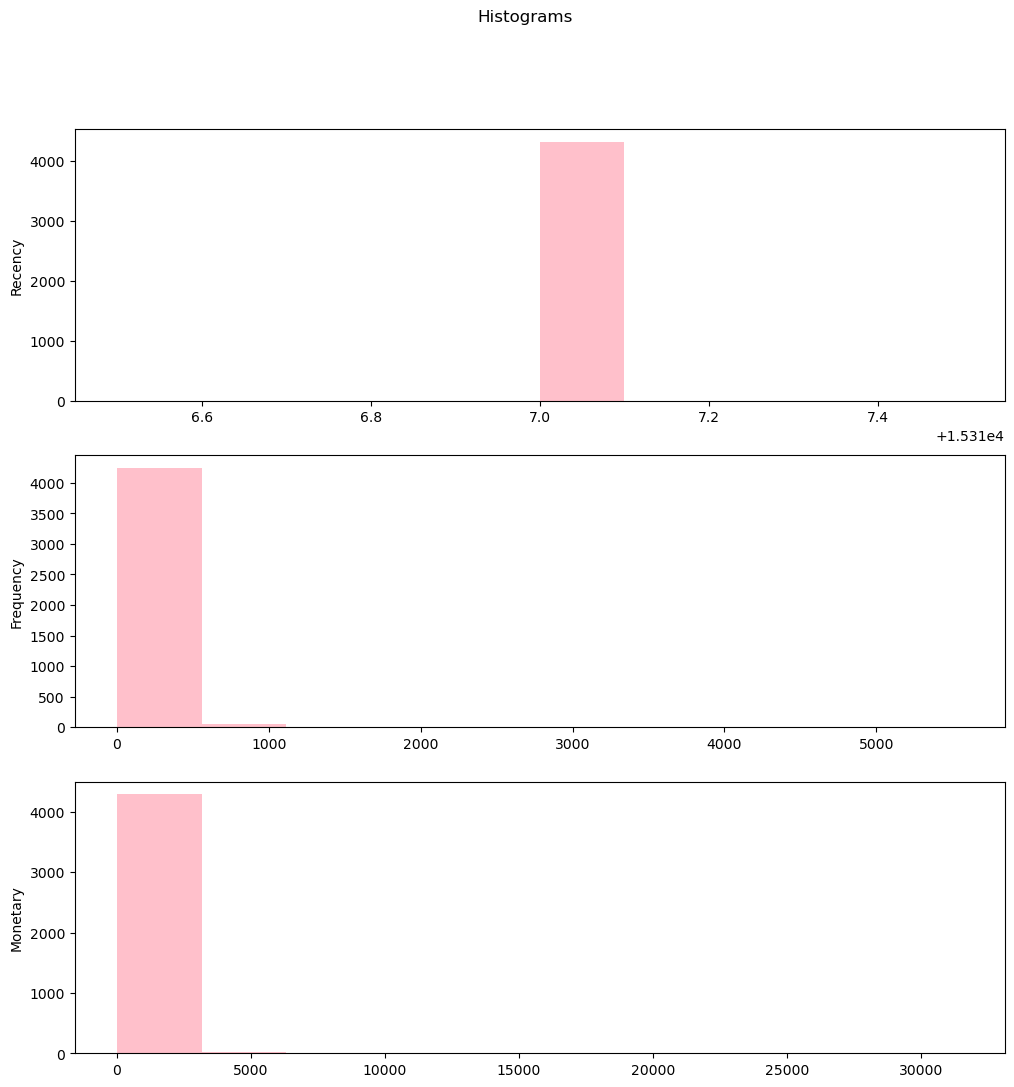

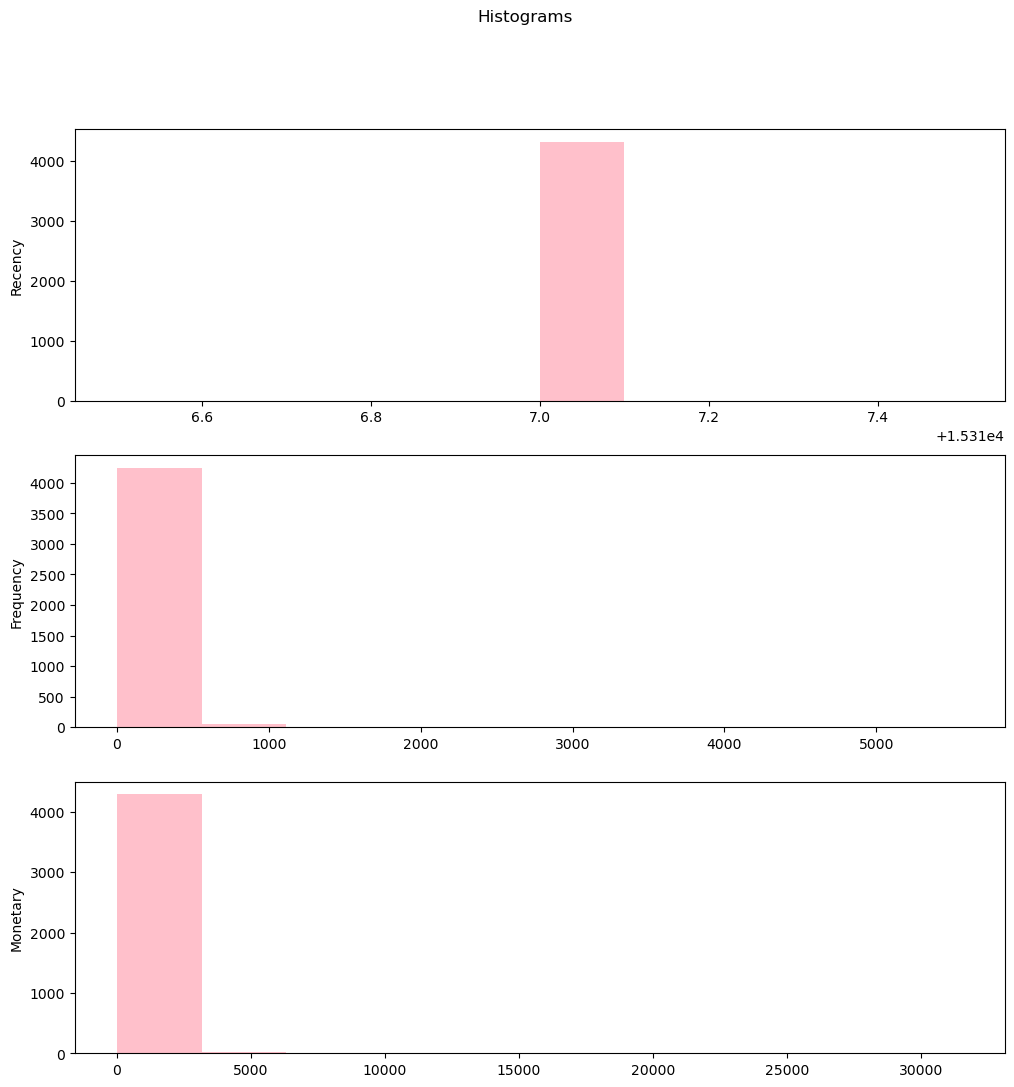

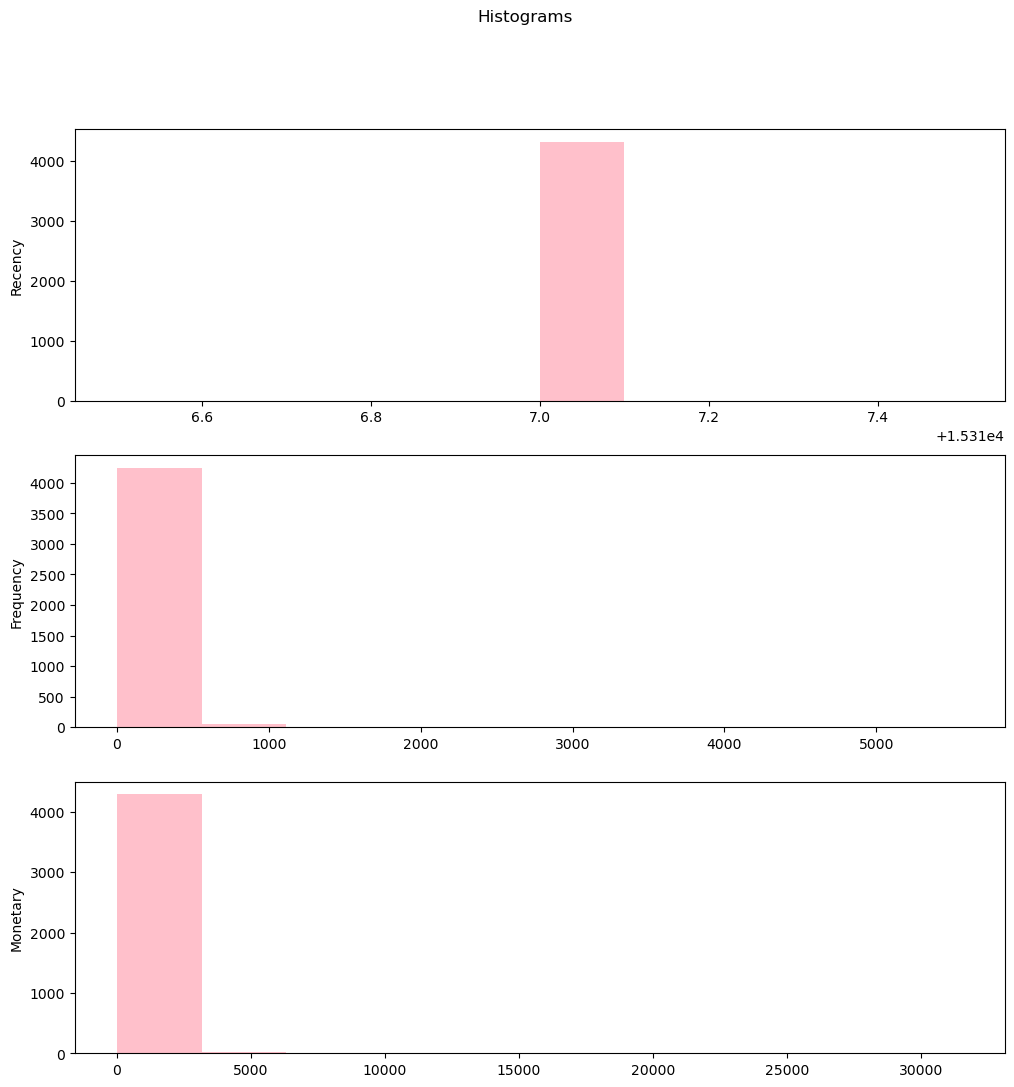

In [148]:

fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
rfm_sgmnt.Recency.plot.hist(ax = ax4, figsize = (12,12), color='pink');
rfm_sgmnt.Frequency.sort_values().plot.hist(ax = ax5, color='pink');
rfm_sgmnt.Monetary.sort_values().plot.hist(ax = ax6, color='pink');
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Monetary')
plt.show()

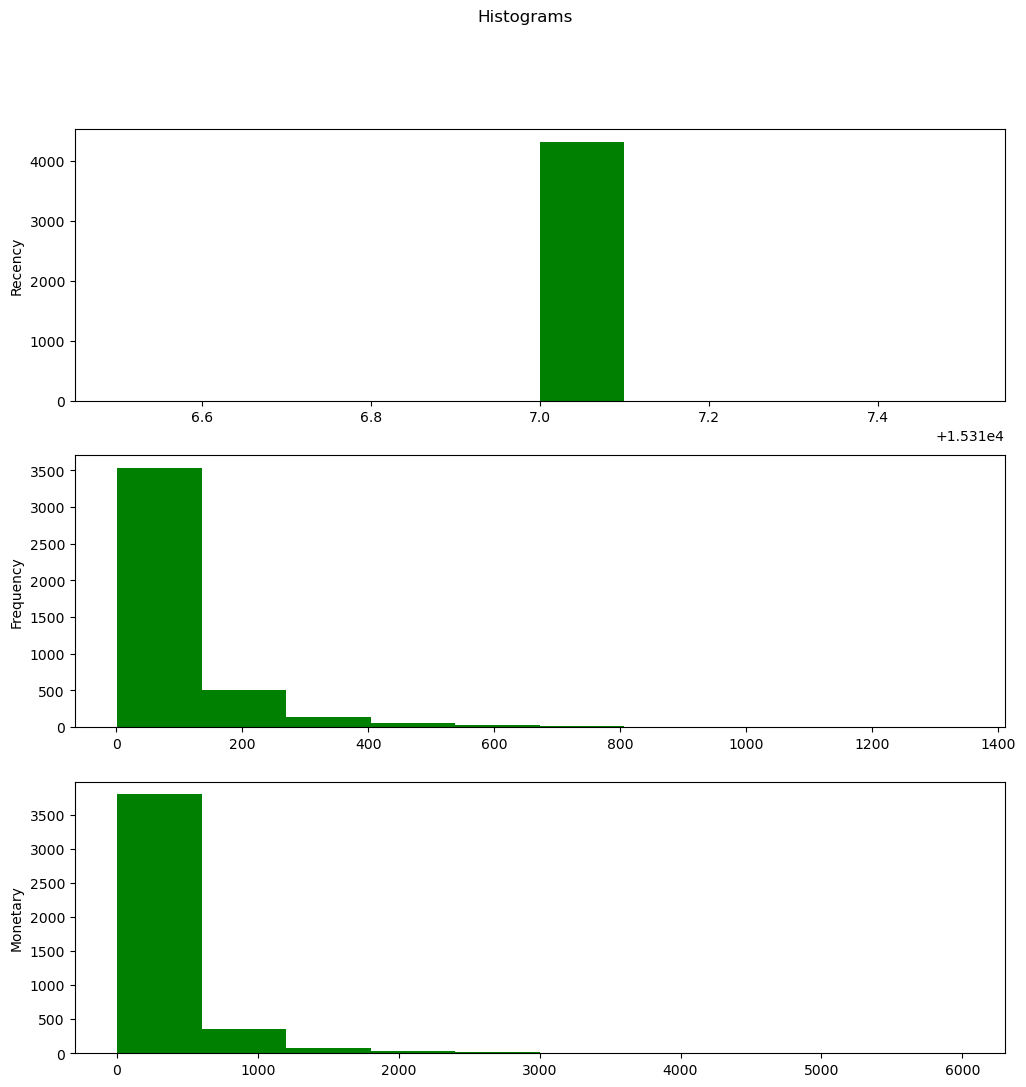

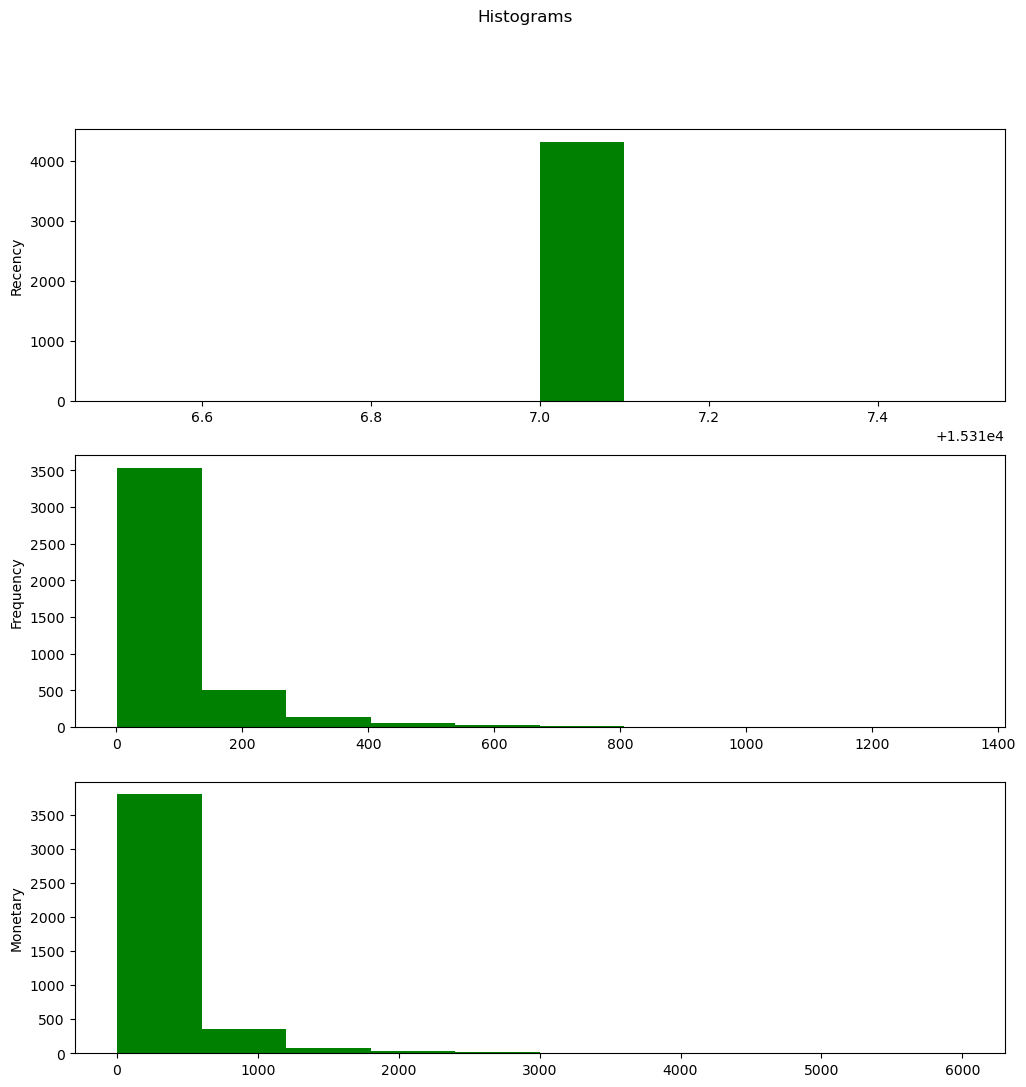

In [150]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
rfm_sgmnt.Recency.plot.hist(ax = ax4, figsize = (12,12), color='green');
rfm_sgmnt.Frequency.sort_values().head(4300).plot.hist(ax = ax5, color='green');
rfm_sgmnt.Monetary.sort_values().head(4300).plot.hist(ax = ax6, color='green');
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Monetary')
plt.show()

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [153]:
rfm_adj_raw = rfm_sgmnt.loc[:, 'Recency':'Monetary']
rfm_adj_raw.head()

,Recency,Frequency,Monetary
0,15317,33,206.36
1,15317,71,162.95
2,15317,20,14.39
3,15317,102,875.34
4,15317,21,49.46


In [154]:
rfm_scores = pd.DataFrame()
rfm_scores['R'] = rfm_sgmnt['Recency'].apply(Rfunction, args=('Recency', quartiles))
rfm_scores['F'] = rfm_sgmnt['Frequency'].apply(FMfunction, args=('Frequency', quartiles))
rfm_scores['M'] = rfm_sgmnt['Monetary'].apply(FMfunction, args=('Monetary', quartiles))

rfm_scores.head()

,R,F,M
0,1,3,2
1,1,2,2
2,1,3,4
3,1,1,1
4,1,3,4


In [155]:
scaler = StandardScaler().fit(rfm_adj_raw)
rfm_adj_std = pd.DataFrame(scaler.transform(rfm_adj_raw), columns=rfm_adj_raw.columns)
rfm_adj_std.head()

,Recency,Frequency,Monetary
0,0.0,-0.301563,-0.117728
1,0.0,-0.110499,-0.168325
2,0.0,-0.366927,-0.341481
3,0.0,0.045369,0.662010
4,0.0,-0.361899,-0.300604


In [157]:
distortions = []
K = range(1, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_adj_std)
    distortions.append(kmeans.inertia_)

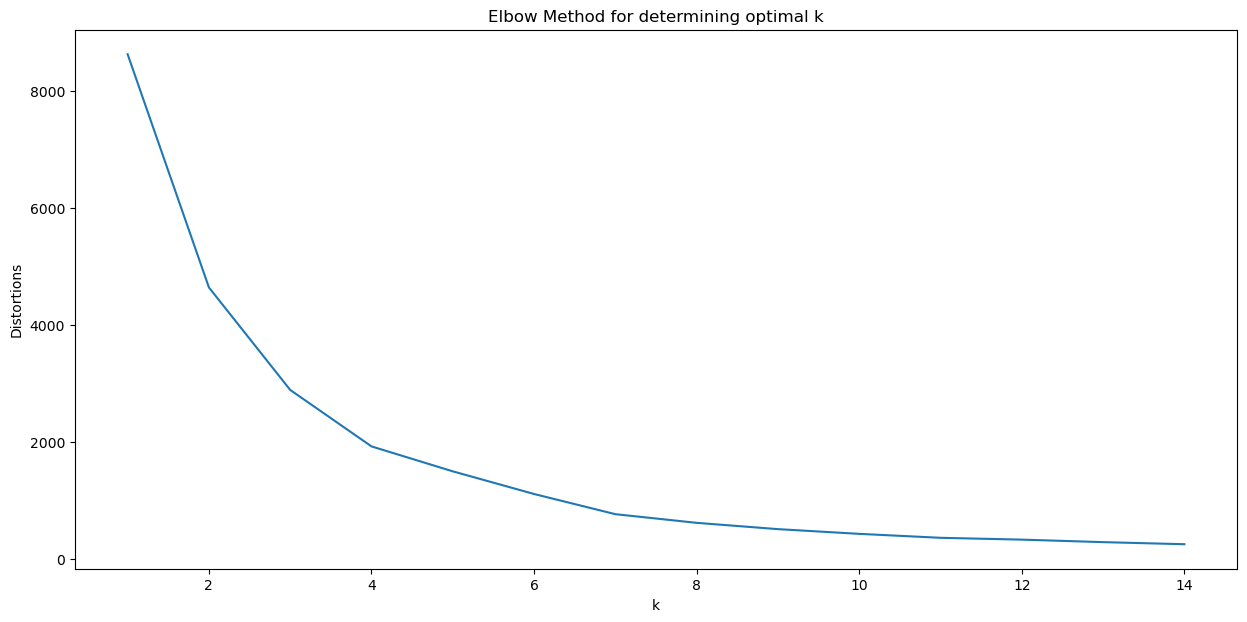

In [158]:
plt.figure(figsize=(15, 7))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method for determining optimal k')
plt.show()

In [159]:
error_table = pd.DataFrame(K, distortions)
error_table

,0
8624.000000,1
4638.397475,2
2887.016561,3
1921.739046,4
1495.638246,5
1108.340415,6
763.358033,7
615.514788,8
507.814524,9
427.228105,10


In [ ]:
min(distortions)

250.095767113533

In [164]:
distortions[13]

250.095767113533

In [165]:
model = KMeans(n_clusters=13, random_state=42)
model.fit(rfm_adj_std)
model.labels_.shape

(4312,)

In [166]:

rfm_adj_std.shape

(4312, 3)

In [168]:
rfm_adj_std['Cluster'] = model.labels_
rfm_adj_std['Customer ID'] = rfm_sgmnt['Customer ID']
rfm_adj_std.head()

,Recency,Frequency,Monetary,Cluster,Customer ID
0,0.0,-0.301563,-0.117728,0,12346.0
1,0.0,-0.110499,-0.168325,10,12347.0
2,0.0,-0.366927,-0.341481,0,12348.0
3,0.0,0.045369,0.662010,7,12349.0
4,0.0,-0.361899,-0.300604,0,12351.0


In [171]:
rfm_adj_std['Profile'] = model.labels_
rfm_adj_std['Profile'].replace({0: "Low",
                                1: "Low",
                                2: "Low",
                                3: "Low",
                                4:"Middle",
                                5: "Middle",
                                6: "Middle",
                                7: "High",
                                8: "High",
                                9: "High",
                                10: "High",
                                11: "High",
                                12: "High"}, inplace = True)

C:\Users\Samson Silvester\AppData\Local\Temp\ipykernel_17808\1138498346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_adj_std['Profile'].replace({0: "Low",


In [172]:

rfm_adj_std.head()

,Recency,Frequency,Monetary,Cluster,Customer ID,Profile
0,0.0,-0.301563,-0.117728,0,12346.0,Low
1,0.0,-0.110499,-0.168325,10,12347.0,High
2,0.0,-0.366927,-0.341481,0,12348.0,Low
3,0.0,0.045369,0.662010,7,12349.0,High
4,0.0,-0.361899,-0.300604,0,12351.0,Low


In [ ]:
import os
output_dir = 'output_file'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

rfm_sgmnt.to_csv('output_file/rfm_segments.csv', index=False)
rfm_adj_std.to_csv('output_file/kmeans_profiles.csv', index=False)
retail_data.to_csv('output_file/retail_data.csv', index=False)
error_table.to_csv('output_file/error_table.csv')